In [1]:
import pandas as pd
import numpy as np
#Sets the df size in python.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 1000)

In [2]:
#WB share of population living in urban areas in 2019.
df = pd.read_xml('https://api.worldbank.org/v2/country/all/indicator/SP.URB.TOTL.IN.ZS?date=2019&format=xml&per_page=300')
df
#WB total population in 2019.
df1 = pd.read_xml('https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2019&format=xml&per_page=300')
df1f = df1[df1['value'] > 20000000] #Filter df for countries with populations greater than 9 million people.

mdf = df.join(df1f.set_index('country'),on='country',rsuffix='_tot_pop',lsuffix='_sh_urb', how='inner')
#mdf


In [3]:
#OWID covid19 dataset
owid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv')

In [4]:
#Merge the owid df with the wb df.

#The OWID data only has countries, therefore merging on inner removes other regional statistics that the WB includes.
fmdf = pd.merge(mdf,owid,left_on='countryiso3code_sh_urb',right_on='iso_code',how='inner') 
 
#Such as a data value for World, Arab World etc.
fmdf1 = fmdf.dropna(axis=1) #Drop columns with nan values.
fmdf1 = fmdf1.sort_values(by='gdp_per_capita',ascending=False)
fmdf1.columns

Index(['indicator_sh_urb', 'country', 'countryiso3code_sh_urb', 'date_sh_urb',
       'value_sh_urb', 'decimal_sh_urb', 'indicator_tot_pop',
       'countryiso3code_tot_pop', 'date_tot_pop', 'value_tot_pop',
       'decimal_tot_pop', 'iso_code', 'continent', 'location',
       'last_updated_date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index'],
      dtype='object')

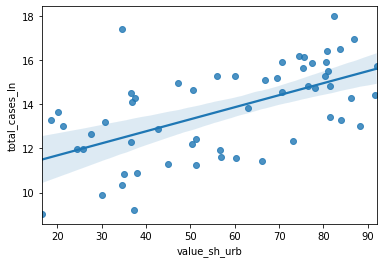

In [5]:
import seaborn as sns
fmdf1['total_cases_ln'] = np.log(fmdf1['total_cases']) #Calculate the ln values of total cases.
fmdf1['total_deaths_ln'] = np.log(fmdf1['total_deaths']) #Calculate the ln values of total deaths.
sns.regplot(data=fmdf1[0:60],x='value_sh_urb',y='total_cases_ln')


fmdf1.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\covid_pop_urb.csv')
#https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/covid_pop_urb.csv This is the raw github url.

The Mean Squared Error is- 2380.762202007919
Model slope:     [0.05456936]
Model intercept: [10.59567226]
Coefficients: 
 [[0.05456936]]
Variance score: 0.34476308473152606
Ttest_1sampResult(statistic=array([19.31768896]), pvalue=array([1.95301873e-26]))


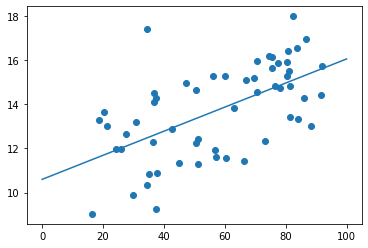

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression(fit_intercept=True)

data = fmdf1
x = data[['value_sh_urb']]
y = data[['total_cases_ln']]

model.fit(x, y)

xfit = np.linspace(0, 100, 1000) #1000 values between 0 and 100 to run the regression model on.
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

from sklearn.metrics import mean_squared_error 
print("The Mean Squared Error is- {}".format(mean_squared_error(x, y))) 



print("Model slope:    ", model.coef_[0]) #Gradient of the model.
print("Model intercept:", model.intercept_) #Y intercept of the model.

print('Coefficients: \n', model.coef_) #Shows the coefficients of the 3 regressors used in the model.
print('Variance score: {}'.format(model.score(x, y))) #Calculates the variance.
import scipy
from scipy import stats
print(scipy.stats.ttest_1samp(x,popmean=0)) #Calculates the t statistic and p value of the independent variable.